Relabeling
=======

Recall that **Variable**s in **Prove-It** are arbitrary labels that are interchangeable. In `tutorial_01_core_expr`, we demonstrated using the `relabeled` method of **Expression** to transform an expression to one with **Variable**s swapped for other **Variable**s.  This was, however, only a transformation of the expression with no proof implication.  Here we will discuss the *relabeling* derivation step in which we can derive a new **KnownTruth** from an existing **KnownTruth** be swapping **Variable**s for other **Variable**s.

### Attempting to relabel a free Variable of an assumption

Let us take an example from the previous tutorial notebook:

In [1]:
from proveit import Implies # actually defined in proveit.logic.boolean.boolOps.py
from proveit.common import A, B
A_impl_B = Implies(A, B)
A_impl_B # Expression meaning "A implies B":

In [2]:
B_from_A = A_impl_B.deriveConclusion(assumptions={A, A_impl_B})
B_from_A

Now we will attempt to perform a relabeling derivation step by calling the `relabel` method on a **KnownTruth**.  This will not work because we are not allowed to relabel a **Variable** in the list of assumptions.  Otherwise we would end up being able to prove false statements (unless we relabeled the assumptions in a consistent manner, but **Prove-It** has a different mechanism for doing this).

In [3]:
from proveit.common import C
from proveit import RelabelingFailure
try:
    B_from_A.relabel({B:C})
except RelabelingFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Cannot relabel using assumptions that involve any of the relabeling variables


### Convert 'implicit' assumptions to 'explicit' hypotheses

If we convert the assumptions to explicit hypotheses first, then we can do the relabeling that we failed to do before.

In [4]:
explicit_B_from_A = B_from_A.asImplication(A_impl_B).asImplication(A)
explicit_B_from_A

This is a true statement that requires no assumptions.  This statement is valid for any value of $A$ and $B$ according to the rule that an implication is true as long as the conclusion is true whenever the hypothesis is true (but otherwise being indifferent to truth-aptness).  Now we will relabel $B$ to $C$ by calling **KnownTruth**'s `relabel` method.

In [5]:
explicit_C_from_A = explicit_B_from_A.relabel({B:C})
explicit_C_from_A

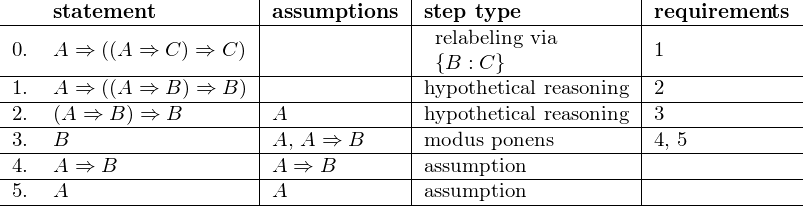

In [6]:
explicit_C_from_A.proof() # here is the full proof

### Simultaneous relabeling

Relabeling will occur simultaneously in a consistent manner.  For example, we can switch labels.

In [7]:
explicit_B_from_A.relabel({A:B, B:A})

Let us try a case with three labels that we will cycle.

In [8]:
nestedImpl = Implies(A, Implies(B, C))
nestedImpl

In [9]:
CfromNestedImpl = nestedImpl.deriveConclusion({nestedImpl, A}).deriveConclusion({nestedImpl, A, B})
CfromNestedImpl

In [10]:
cascadingImpl = CfromNestedImpl.asImplication(nestedImpl).asImplication(B).asImplication(A)
cascadingImpl

Convincing yourself that this is correct is left as an exercise to the reader (you could make a truth table and/or check the logic that got us to this point).  In any case, now we will demonstrate relabeling cycle.

In [11]:
relabeledCascadingImpl = cascadingImpl.relabel({A:B, B:C, C:A})
relabeledCascadingImpl

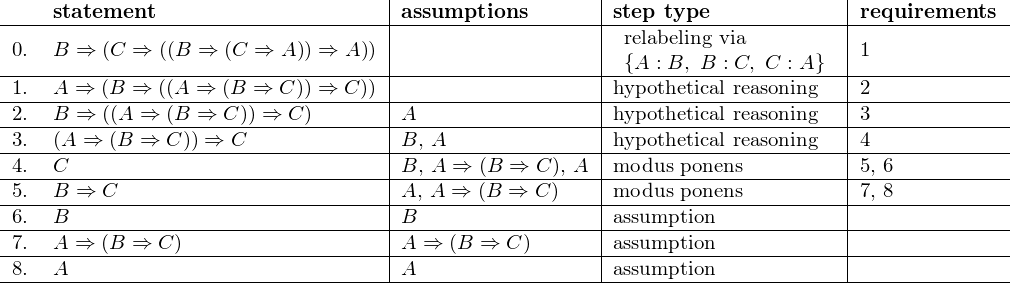

In [12]:
relabeledCascadingImpl.proof() # for fun, let's look at the proof

### Duplicated relabeling

It is possible to relabel multiple **Variable**s to the same **Variable** to derive a **KnownTruth** that is weaker than the original statement.

In [13]:
redundantCascadingImpl = cascadingImpl.relabel({A:B})
redundantCascadingImpl

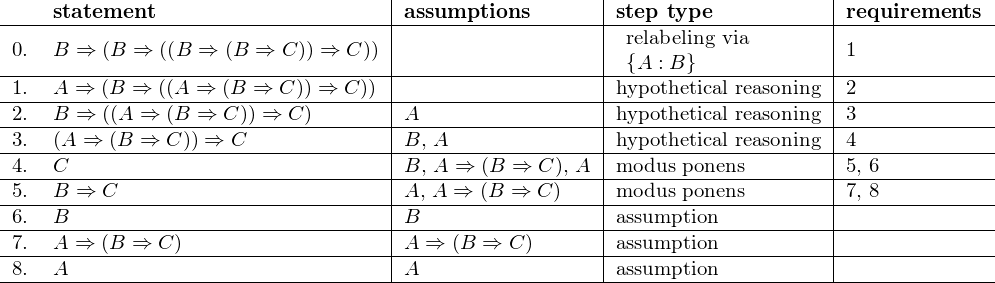

In [14]:
redundantCascadingImpl.proof()

### Literals cannot be relabeled

We saw that **Literal**s cannot be relabeled in *expression relabeling* in `tutorial01_core_expr`.  Let us revisit this and verify that we cannot perform a relabeling derivation step.

In [15]:
from proveit import Literal
X = Literal('tutorial', 'X')
Y = Literal('tutorial', 'Y')
Z = Literal('tutorial', 'Z')

In [16]:
XYZimpl = Implies(X, Implies(Y, Z))
XYZimpl

Let us try to relabel this.  Our first mistake will be that the expression is not a **KnownTruth**.

In [17]:
from proveit import RelabelingFailure
try:
    XYZimpl.relabel({Y:C})
except RelabelingFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Unproven general expression: X => (Y => Z) assuming {}


Note that we are calling the **Expression** `relabel` method rather than a **KnownTruth** `relabel` method.  Assumptions may be provided to the **Expression** `relabel` method to find/make a **KnownTruth** (this is not necessary when using the **KnownTruth** `relabel` method).

In [18]:
from proveit import RelabelingFailure
try:
    XYZimpl.relabel({Y:C}, assumptions={XYZimpl})
except RelabelingFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: May only relabel a Variable or a Bundled Variable


That time, we got the error message that only **Variable**s, or *bundled* **Variables**, may be relabeled, not **Literal**s.  We will demonstrated *bundled* **Variable** relabeling in a later section.

### Scoping violation

We also noted with *expression relabeling* in `tutorial01_core_expr` that we are not allowed to violate the scoping restrictions of **Lambda** expressions.  We will revisit this for the case of the *relabeling* derivation step.  We will invoke an axiom from the `logic.equality` package for this next example.

LET'S DO A GEOMETRIC SERIES EXAMPLE INSTEAD.  IT WOULD MAKE A NICE EXAMPLE AND OFFER FAMILIARITY.

In [19]:
from proveit import Lambda, ScopingViolation
from proveit.logic import Equals, InSet
from proveit.number import Add, Complexes

In [20]:
complexA = InSet(A, Complexes)
complexB = InSet(B, Complexes)
addCommuteAB = Add(A, B).commute(assumptions={complexA, complexB})
addCommuteAB

In [21]:
from proveit.common import x, X
addCommuteLambdEquiv = addCommuteAB.substitution(Lambda(x, X), X, assumptions={complexA, complexB})
addCommuteLambdEquiv

In [22]:
addCommuteLambdEquivExplicit = addCommuteLambdEquiv.asImplication(complexB).asImplication(complexA)
addCommuteLambdEquivExplicit

In [23]:
try:
    addCommuteLambdEquivExplicit.relabel({A:x})
except ScopingViolation as e:
    print 'EXPECTED ERROR:', e

EXPECTED ERROR: Relabeling in violation of Variable scoping restrictions.


In [24]:
addCommuteLambdEquivExplicit.relabel({A:x, x:A})

In [25]:
equalsSymmetry.exprInfo()

NameError: name 'equalsSymmetry' is not defined

In [ ]:
try:
    equalsTransitivity.relabeled({x:y})
except ScopingViolation as e:
    print "EXPECTED ERROR:", e

We could not relabel $x$ to $y$ because 


In [ ]:
equalsTransitivity.specialize().generalize({x, y})

In [ ]:
equalsTransitivity.specialize().generalize({x, y}).relabeled({z:x})

In [ ]:
from proveit.logic import Forall, NotExists, Equals
from proveit.number import Add, Pow, Naturals, NaturalsPos, GreaterThan, num
from proveit.common import a, b, c, n

In [ ]:
fermatsLast = Forall(n, NotExists((a, b, c), 
                                  Equals(Add(Pow(a, n), Pow(b, n)), Pow(c, n)), 
                                  domain=NaturalsPos), 
                     domain=Naturals, conditions=[GreaterThan(n, num(2))])
fermatsLast

where $\mathbb{N}$ is the set of natural numbers (including zero) and $\mathbb{N}^+$ is the set of positive integers (excludes zero).  In words, this says "forall n in the set of natural numbers such that $n > 2$, there does not exist $a$, $b$, and $c$ in the set of positive integers such that $a^n + b^n = c^n$".

The `logic` and `number` packages will be explored in more depth in later tutorial notebooks.  For now, we will simply take a peek at the **Expression** information.  It is a bit involved and illustrates the substantial value of the mathematical formatting in LaTeX to concisely represent a mathematical expression.

In [ ]:
fermatsLast.exprInfo()

Now we will use relabeling on Fermat's last theorem to prove that we can write it in terms of $x$, $y$, and $z$ instead of $a$, $b$, and $c$, taking Fermat's last theorem itself to simply be an assumption.  We will use the **Expression** `relabel` method this time, which is like the **KnownTruth** `relabel` method except that it needs to know the assumptions explicitly (the **KnownTruth** version simply uses the assumptions used in the **KnownTruth**).

In [ ]:
from proveit.common import x, y, z
fermatsLast_xyz = fermatsLast.relabel({a:x, b:y, c:z}, assumptions={fermatsLast})
fermatsLast_xyz

In [ ]:
fermatsLast_xyz.proof()

However, we are subject to **Lambda** scoping restrictions if we try to relabel one of these **Variables** to another as they are each defined within a scope that must be respected (or the meaning could be changed in a manner that is not strictly weaker).

In [ ]:
from proveit import ScopingViolation
try:
    fermatsLast.relabel({a:n}, assumptions={fermatsLast})
except ScopingViolation as e:
    print 'EXPECTED ERROR:', e

In [ ]:
from proveit import ScopingViolation
try:
    fermatsLast.relabel({n:a}, assumptions={fermatsLast})
except ScopingViolation as e:
    print 'EXPECTED ERROR:', e